## LSTM Model using Regressor 

## GBP Close vs SMA50

This is a simple model using X = "SMA50" and y = "Close" to check if moving average is a decent predictor of GBPUSD price.

Below we ran the models 3 times with different parameters

First run: 3 layers LSTM, 12,24,24 units with 35 epochs

We then increased the layers more significantly as the predictons in the first run was poor. 

Second run: 3 layers LSTM, 60 128 128 256 units with 100 epochs

Third run: 3 layers LSTM, 60 128 256 256 units with 200 epochs

Lets dive in and look at the results!


In [1]:
import importlib
import datetime as dt
import numpy as np
import pandas as pd
from fxcmpy import fxcmpy_tick_data_reader as tdr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import talib as ta
from talib import RSI, BBANDS
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
gbp1 = pd.read_csv(f'C:/Users/STELLA/Desktop/Data Science/DS106/GBPUSD_NN.csv')
data_gbp1 = gbp1.reset_index().loc[:,['Close','SMA50']]
data_gbp1

,Close,SMA50
0,1.308385,1.307724
1,1.308365,1.307735
2,1.308375,1.307750
3,1.308345,1.307771
4,1.308300,1.307797
...,...,...
355502,1.353475,1.353524
355503,1.353470,1.353519
355504,1.353475,1.353515
355505,1.353400,1.353505


In [3]:
y = data_gbp1['Close'].values.reshape(-1,1)
X = data_gbp1['SMA50'].values.reshape(-1,1)

#sc = MinMaxScaler(feature_range = (0, 1))
#X_scaled = sc.fit_transform(X)

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
X_train = np.reshape(X_train, (len(X_train), 1, 1)) 
X_test = np.reshape(X_test, (len(X_test), 1, 1))
y_train = np.reshape(y_train, (len(ytrain), 1, 1)) 
y_test = np.reshape(y_train, (len(y_test), 1, 1)) _

In [6]:
y_train

array([[[1.23154 ]],

       [[1.24473 ]],

       [[1.28788 ]],

       ...,

       [[1.33019 ]],

       [[1.28604 ]],

       [[1.295935]]])

In [7]:
#Initializing the regressor Network
regressor = Sequential()

#Adding the input LSTM network layer
regressor.add(LSTM(60,activation='relu', input_shape = (X_train.shape[1], 1), return_sequences=True))
regressor.add(Dropout(0.2))

#Adding a second LSTM network layer
regressor.add(LSTM(60, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a third LSTM network layer
regressor.add(LSTM(60, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(1))

In [8]:
#Compiling the network
regressor.compile( loss='mean_squared_error',
              optimizer=Adam(lr=1e-6),
              metrics=['mse'] )

#Fitting the data to the model
regressor.fit(X_train,y_train, epochs=100)

Epoch 1/100
8888/8888 [==============================] - 29s 3ms/step - loss: 1.5883 - mse: 1.5883
Epoch 2/100
8888/8888 [==============================] - 30s 3ms/step - loss: 1.4395 - mse: 1.4395
Epoch 3/100
8888/8888 [==============================] - 30s 3ms/step - loss: 1.2269 - mse: 1.2269
Epoch 4/100
8888/8888 [==============================] - 31s 3ms/step - loss: 0.9381 - mse: 0.9381
Epoch 5/100
8888/8888 [==============================] - 31s 3ms/step - loss: 0.5833 - mse: 0.5833
Epoch 6/100
8888/8888 [==============================] - 31s 4ms/step - loss: 0.2297 - mse: 0.2297
Epoch 7/100
8888/8888 [==============================] - 31s 3ms/step - loss: 0.0362 - mse: 0.0362
Epoch 8/100
8888/8888 [==============================] - 31s 3ms/step - loss: 0.0191 - mse: 0.0191
Epoch 9/100
8888/8888 [==============================] - 32s 4ms/step - loss: 0.0183 - mse: 0.0183
Epoch 10/100
8888/8888 [==============================] - 31s 4ms/step - loss: 0.0176 - mse: 0.0176
Epoch 11/

In [9]:
predictions  = regressor.predict(X_test)
x = predictions.reshape(-1,1)
x

array([[1.2825699],
       [1.2823031],
       [1.2841845],
       ...,
       [1.2797034],
       [1.2758465],
       [1.2807232]], dtype=float32)

In [10]:
y_test = np.reshape(y_test, (len(y_test), 1))
y_test.shape

(71102, 1)

In [11]:
y_test

array([[1.32213 ],
       [1.318535],
       [1.34316 ],
       ...,
       [1.285015],
       [1.236135],
       [1.298185]])

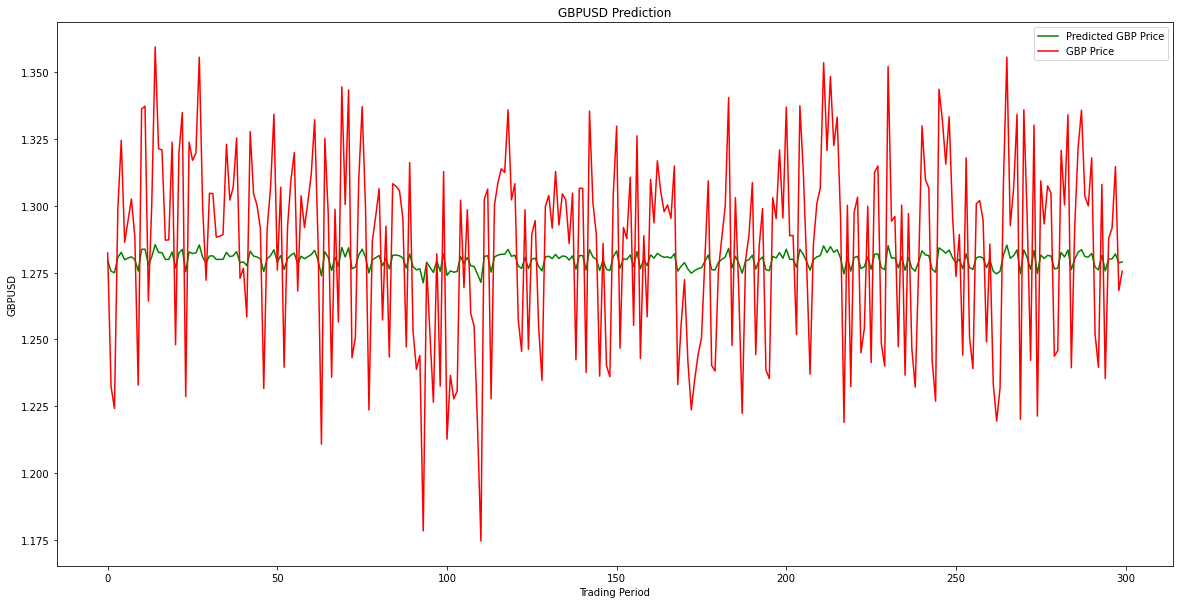

In [12]:
plt.figure(figsize=(20,10))
plt.plot(x[5000:5300,:], color = 'green', label = 'Predicted GBP Price')
plt.plot(y_test[5000:5300,:], color = 'red', label = 'GBP Price' )
plt.title('GBPUSD Prediction')
plt.xlabel('Trading Period')
plt.ylabel('GBPUSD')
plt.legend()
plt.show()

### Prediction versus test results were poor in the first run so lets tweak the LSTN parameters further and do a second run.

In [24]:
#Initializing the regressor Network
regressor = Sequential()

#Adding the input LSTM network layer
regressor.add(LSTM(60,activation='relu', input_shape = (X_train.shape[1], 1), return_sequences=True))
regressor.add(Dropout(0.2))

#Adding a second LSTM network layer
regressor.add(LSTM(128, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a third LSTM network layer
regressor.add(LSTM(128, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a fourth LSTM network layer
regressor.add(LSTM(256, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(1))

In [25]:
#Compiling the network
regressor.compile( loss='mean_squared_error',
              optimizer=Adam(lr=1e-6),
              metrics=['mse'] )

#Fitting the data to the model
regressor.fit(X_train,y_train, epochs=100)

Epoch 1/100
8888/8888 [==============================] - 64s 7ms/step - loss: 1.5284 - mse: 1.5284
Epoch 2/100
8888/8888 [==============================] - 65s 7ms/step - loss: 1.0552 - mse: 1.0552
Epoch 3/100
8888/8888 [==============================] - 65s 7ms/step - loss: 0.2914 - mse: 0.2914
Epoch 4/100
8888/8888 [==============================] - 66s 7ms/step - loss: 0.0117 - mse: 0.0117
Epoch 5/100
8888/8888 [==============================] - 66s 7ms/step - loss: 0.0099 - mse: 0.0099
Epoch 6/100
8888/8888 [==============================] - 66s 7ms/step - loss: 0.0090 - mse: 0.0090
Epoch 7/100
8888/8888 [==============================] - 66s 7ms/step - loss: 0.0081 - mse: 0.0081
Epoch 8/100
8888/8888 [==============================] - 65s 7ms/step - loss: 0.0075 - mse: 0.0075
Epoch 9/100
8888/8888 [==============================] - 66s 7ms/step - loss: 0.0069 - mse: 0.0069
Epoch 10/100
8888/8888 [==============================] - 66s 7ms/step - loss: 0.0065 - mse: 0.0065
Epoch 11/

8888/8888 [==============================] - 64s 7ms/step - loss: 0.0027 - mse: 0.0027
Epoch 84/100
8888/8888 [==============================] - 64s 7ms/step - loss: 0.0027 - mse: 0.0027
Epoch 85/100
8888/8888 [==============================] - 64s 7ms/step - loss: 0.0026 - mse: 0.0026
Epoch 86/100
8888/8888 [==============================] - 64s 7ms/step - loss: 0.0026 - mse: 0.0026
Epoch 87/100
8888/8888 [==============================] - 64s 7ms/step - loss: 0.0026 - mse: 0.0026
Epoch 88/100
8888/8888 [==============================] - 64s 7ms/step - loss: 0.0026 - mse: 0.0026
Epoch 89/100
8888/8888 [==============================] - 64s 7ms/step - loss: 0.0026 - mse: 0.0026
Epoch 90/100
8888/8888 [==============================] - 64s 7ms/step - loss: 0.0026 - mse: 0.0026
Epoch 91/100
8888/8888 [==============================] - 64s 7ms/step - loss: 0.0026 - mse: 0.0026
Epoch 92/100
8888/8888 [==============================] - 64s 7ms/step - loss: 0.0025 - mse: 0.0025
Epoch 93/100


In [26]:
predictions  = regressor.predict(X_test)
predict_1 = predictions.reshape(-1,1)
predict_1

array([[1.290668 ],
       [1.2899334],
       [1.2951231],
       ...,
       [1.282794 ],
       [1.2722718],
       [1.2855902]], dtype=float32)

In [27]:
y_test = np.reshape(y_test, (len(y_test), 1))
y_test.shape

(71102, 1)

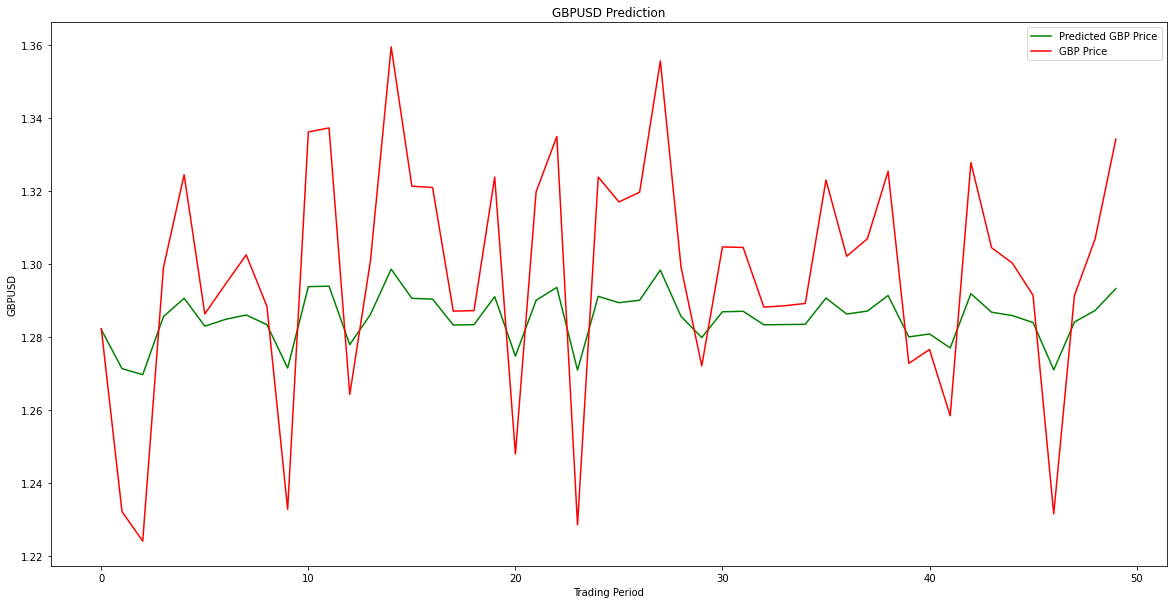

In [28]:
plt.figure(figsize=(20,10))
plt.plot(predict_1[5000:5050,:], color = 'green', label = 'Predicted GBP Price')
plt.plot(y_test[5000:5050,:], color = 'red', label = 'GBP Price' )
plt.title('GBPUSD Prediction')
plt.xlabel('Trading Period')
plt.ylabel('GBPUSD')
plt.legend()
plt.show()

### For the third run, we tweak the 3rd layer to 256 units (from 128) and add another 100 epochs

In [29]:
#Initializing the regressor Network
regressor = Sequential()

#Adding the input LSTM network layer
regressor.add(LSTM(60,activation='relu', input_shape = (X_train.shape[1], 1), return_sequences=True))
regressor.add(Dropout(0.2))

#Adding a second LSTM network layer
regressor.add(LSTM(128, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a third LSTM network layer
regressor.add(LSTM(256, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a fourth LSTM network layer
regressor.add(LSTM(256, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(1))

In [30]:
#Compiling the network
regressor.compile( loss='mean_squared_error',
              optimizer=Adam(lr=1e-05),
              metrics=['mse'] )

#Fitting the data to the model
regressor.fit(X_train,y_train, epochs=200)

Epoch 1/200
8888/8888 [==============================] - 100s 11ms/step - loss: 0.1856 - mse: 0.1856
Epoch 2/200
8888/8888 [==============================] - 94s 11ms/step - loss: 0.0057 - mse: 0.0057
Epoch 3/200
8888/8888 [==============================] - 87s 10ms/step - loss: 0.0042 - mse: 0.0042
Epoch 4/200
8888/8888 [==============================] - 86s 10ms/step - loss: 0.0038 - mse: 0.0038
Epoch 5/200
8888/8888 [==============================] - 87s 10ms/step - loss: 0.0035 - mse: 0.0035
Epoch 6/200
8888/8888 [==============================] - 86s 10ms/step - loss: 0.0033 - mse: 0.0033
Epoch 7/200
8888/8888 [==============================] - 86s 10ms/step - loss: 0.0032 - mse: 0.0032
Epoch 8/200
8888/8888 [==============================] - 86s 10ms/step - loss: 0.0030 - mse: 0.0030
Epoch 9/200
8888/8888 [==============================] - 86s 10ms/step - loss: 0.0029 - mse: 0.0029
Epoch 10/200
8888/8888 [==============================] - 86s 10ms/step - loss: 0.0027 - mse: 0.002

8888/8888 [==============================] - 86s 10ms/step - loss: 4.2212e-05 - mse: 4.2212e-05
Epoch 152/200
8888/8888 [==============================] - 85s 10ms/step - loss: 4.1994e-05 - mse: 4.1994e-05
Epoch 153/200
8888/8888 [==============================] - 85s 10ms/step - loss: 4.1535e-05 - mse: 4.1535e-05
Epoch 154/200
8888/8888 [==============================] - 86s 10ms/step - loss: 4.1125e-05 - mse: 4.1125e-05
Epoch 155/200
8888/8888 [==============================] - 85s 10ms/step - loss: 4.0641e-05 - mse: 4.0641e-05
Epoch 156/200
8888/8888 [==============================] - 85s 10ms/step - loss: 3.9816e-05 - mse: 3.9816e-05
Epoch 157/200
8888/8888 [==============================] - 86s 10ms/step - loss: 3.9425e-05 - mse: 3.9425e-05
Epoch 158/200
8888/8888 [==============================] - 86s 10ms/step - loss: 3.9230e-05 - mse: 3.9230e-05
Epoch 159/200
8888/8888 [==============================] - 85s 10ms/step - loss: 3.8705e-05 - mse: 3.8705e-05
Epoch 160/200
8888/8888 

In [31]:
regressor.evaluate(X_test,y_test)

2222/2222 [==============================] - 8s 4ms/step - loss: 3.8894e-06 - mse: 3.8894e-06A: 0s - loss: 3.8937e-06 - mse


[3.889356776198838e-06, 3.889356776198838e-06]

In [32]:
predictions  = regressor.predict(X_test)
predict_2 = predictions.reshape(-1,1)
predict_2

array([[1.3223988],
       [1.3189788],
       [1.3398271],
       ...,
       [1.2853187],
       [1.2371895],
       [1.2987574]], dtype=float32)

In [33]:
y_test = np.reshape(y_test, (len(y_test), 1))
y_test

array([[1.32213 ],
       [1.318535],
       [1.34316 ],
       ...,
       [1.285015],
       [1.236135],
       [1.298185]])

In [34]:
predict_2

array([[1.3223988],
       [1.3189788],
       [1.3398271],
       ...,
       [1.2853187],
       [1.2371895],
       [1.2987574]], dtype=float32)

In [35]:
y_test.shape

(71102, 1)

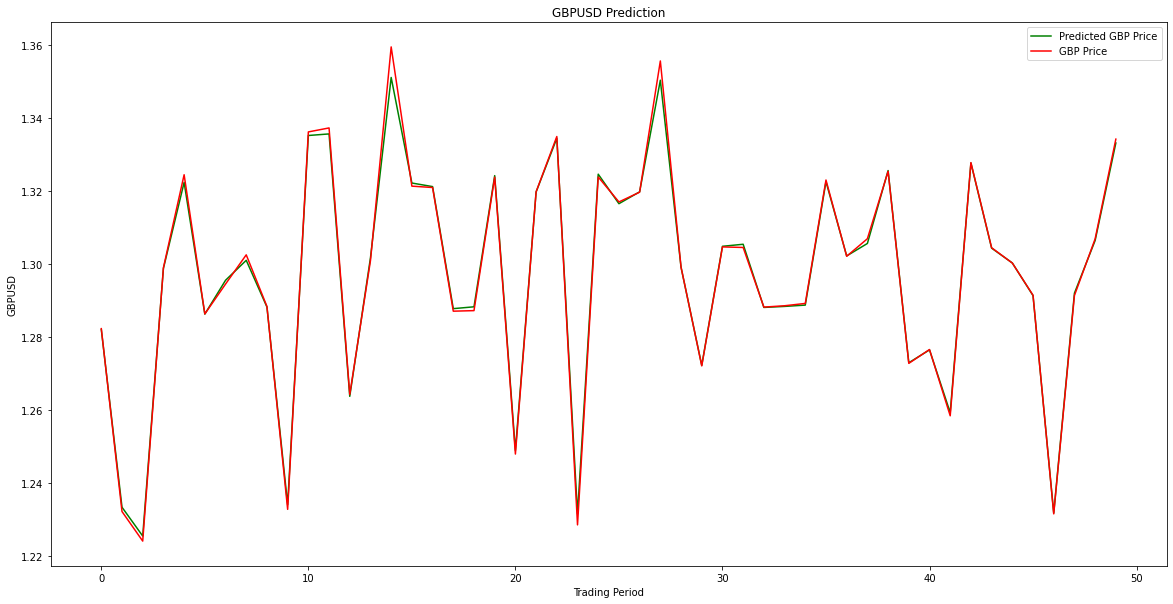

In [45]:
plt.figure(figsize=(20,10))
plt.plot(predict_2[5000:5050,:], color = 'green', label = 'Predicted GBP Price')
plt.plot(y_test[5000:5050,:], color = 'red', label = 'GBP Price' )
plt.title('GBPUSD Prediction')
plt.xlabel('Trading Period')
plt.ylabel('GBPUSD')
plt.legend()
plt.show()

### Next, lets plot the difference between y_test and predicted values for a closer look on the performance of the model

In [39]:
difference =[]
for i in range(0,len(y_test)-1):
    diff = (predict_2[i]-y_test[i])*10000  #convert to pips
    difference.append(diff)
    

In [40]:
difference

[array([2.68781776]),
 array([4.43786469]),
 array([-33.32939301]),
 array([-6.276474]),
 array([9.1751133]),
 array([2.09961853]),
 array([7.77050858]),
 array([13.04862938]),
 array([-84.01981697]),
 array([-4.81300354]),
 array([-12.81436958]),
 array([-16.61994972]),
 array([4.07487679]),
 array([0.14685135]),
 array([0.17265549]),
 array([0.35535698]),
 array([-5.9528183]),
 array([-74.79384727]),
 array([-1.21875687]),
 array([5.02990532]),
 array([13.09938622]),
 array([3.84489403]),
 array([0.39598999]),
 array([0.73388176]),
 array([-1.19965858]),
 array([-6.36658516]),
 array([3.09690361]),
 array([-2.07357521]),
 array([9.8634758]),
 array([-20.70175247]),
 array([17.06596565]),
 array([-5.26305313]),
 array([-20.81766396]),
 array([6.79417229]),
 array([1.35790672]),
 array([-4.5989872]),
 array([-24.8426178]),
 array([1.00045471]),
 array([14.25245705]),
 array([8.21249809]),
 array([6.19109917]),
 array([9.90457458]),
 array([4.91898651]),
 array([8.6362114]),
 array([-15

The differences are pretty decent, kept within 20-30 pips for a good number of periods and looks promising. 

Text(0.5, 1.0, 'Predicted vs Real - Difference in pips')

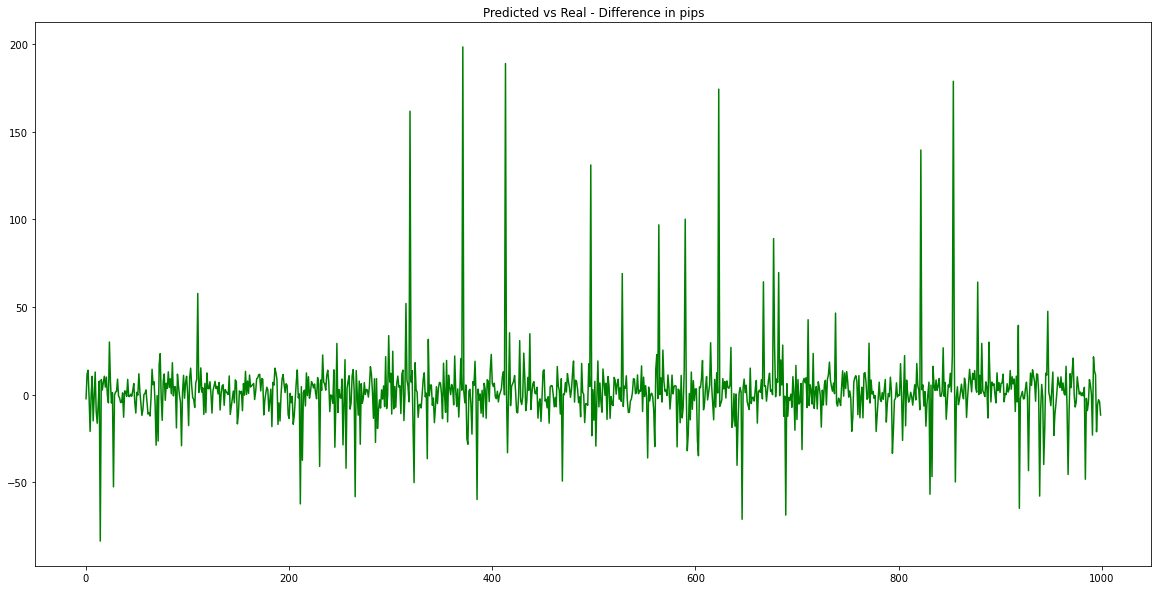

In [41]:
plt.figure(figsize=(20,10))
plt.plot(difference[5000:6000], color = 'green')
plt.title('Predicted vs Real - Difference in pips')

## GBP LSTM REGRESSOR MODEL - Close vs RSI

We will first try a LSTM (60 128 256 256 units) first since it gave decent results for the SMA50 vs Close model, but try put 50 epochs first and tweak along the way

In [76]:
gbp2 = pd.read_csv(f'C:/Users/STELLA/Desktop/Data Science/DS106/GBPUSD_NN.csv')
data_gbp2 = gbp2.reset_index().loc[:,['Close','RSI']]
data_gbp2

,Close,RSI
0,1.308385,65.711586
1,1.308365,64.457885
2,1.308375,64.819304
3,1.308345,62.757536
4,1.308300,59.690514
...,...,...
355502,1.353475,48.199911
355503,1.353470,47.980381
355504,1.353475,48.234288
355505,1.353400,44.709120


In [106]:
y = data_gbp2['Close'].values.reshape(-1,1)
X = data_gbp2['RSI'].values.reshape(-1,1)

sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

array([[0.75568721],
       [0.75559676],
       [0.75564199],
       ...,
       [0.95961286],
       [0.95927366],
       [0.95925105]])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)

In [79]:
X_train = np.reshape(X_train, (len(X_train), 1, 1)) 
X_test = np.reshape(X_test, (len(X_test), 1, 1))
y_train = np.reshape(y_train, (len(y_train), 1, 1)) 
y_test = np.reshape(y_test, (len(y_test), 1, 1))

In [80]:
y_train

array([[[1.3206  ]],

       [[1.24808 ]],

       [[1.318405]],

       ...,

       [[1.293225]],

       [[1.165305]],

       [[1.2369  ]]])

In [84]:
X_train


array([[[0.43249559]],

       [[0.4450347 ]],

       [[0.52628249]],

       ...,

       [[0.32239234]],

       [[0.5842512 ]],

       [[0.49493934]]])

In [85]:
#Initializing the regressor Network
regressor = Sequential()

#Adding the input LSTM network layer
regressor.add(LSTM(60,activation='relu', input_shape = (X_train.shape[1], 1), return_sequences=True))
regressor.add(Dropout(0.2))

#Adding a second LSTM network layer
regressor.add(LSTM(128, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a third LSTM network layer
regressor.add(LSTM(256, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a fourth LSTM network layer
regressor.add(LSTM(256, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(1))

In [95]:
#Compiling the network
regressor.compile( loss='mean_squared_error',
              optimizer=Adam(lr=1e-6),
              metrics=['mse'] )

#Fitting the data to the model
regressor.fit(X_train,y_train, epochs=50)

Epoch 1/50
8888/8888 [==============================] - 91s 10ms/step - loss: 0.1561 - mse: 0.1561
Epoch 2/50
8888/8888 [==============================] - 91s 10ms/step - loss: 0.0105 - mse: 0.0105
Epoch 3/50
8888/8888 [==============================] - 91s 10ms/step - loss: 0.0087 - mse: 0.0087
Epoch 4/50
8888/8888 [==============================] - 92s 10ms/step - loss: 0.0074 - mse: 0.0074
Epoch 5/50
8888/8888 [==============================] - 90s 10ms/step - loss: 0.0066 - mse: 0.0066
Epoch 6/50
8888/8888 [==============================] - 91s 10ms/step - loss: 0.0060 - mse: 0.0060
Epoch 7/50
8888/8888 [==============================] - 94s 11ms/step - loss: 0.0055 - mse: 0.0055
Epoch 8/50
8888/8888 [==============================] - 91s 10ms/step - loss: 0.0052 - mse: 0.0052
Epoch 9/50
8888/8888 [==============================] - 92s 10ms/step - loss: 0.0050 - mse: 0.0050
Epoch 10/50
8888/8888 [==============================] - 89s 10ms/step - loss: 0.0048 - mse: 0.0048
Epoch 11/

In [96]:
regressor.evaluate(X_train, y_train)

8888/8888 [==============================] - 31s 3ms/step - loss: 0.0015 - mse: 0.0015


[0.0015481510199606419, 0.0015481510199606419]

In [97]:
predict = regressor.predict(X_test)

predict.shape
predict

array([[[1.2809588]],

       [[1.281138 ]],

       [[1.2809907]],

       ...,

       [[1.2808641]],

       [[1.2816584]],

       [[1.2810308]]], dtype=float32)

In [98]:
prediction_rsi = predict.reshape(-1,1)


In [101]:
y_test = np.reshape(y_test, (len(y_test), 1))
y_test

array([[1.23378 ],
       [1.3355  ],
       [1.25645 ],
       ...,
       [1.308795],
       [1.236465],
       [1.328005]])

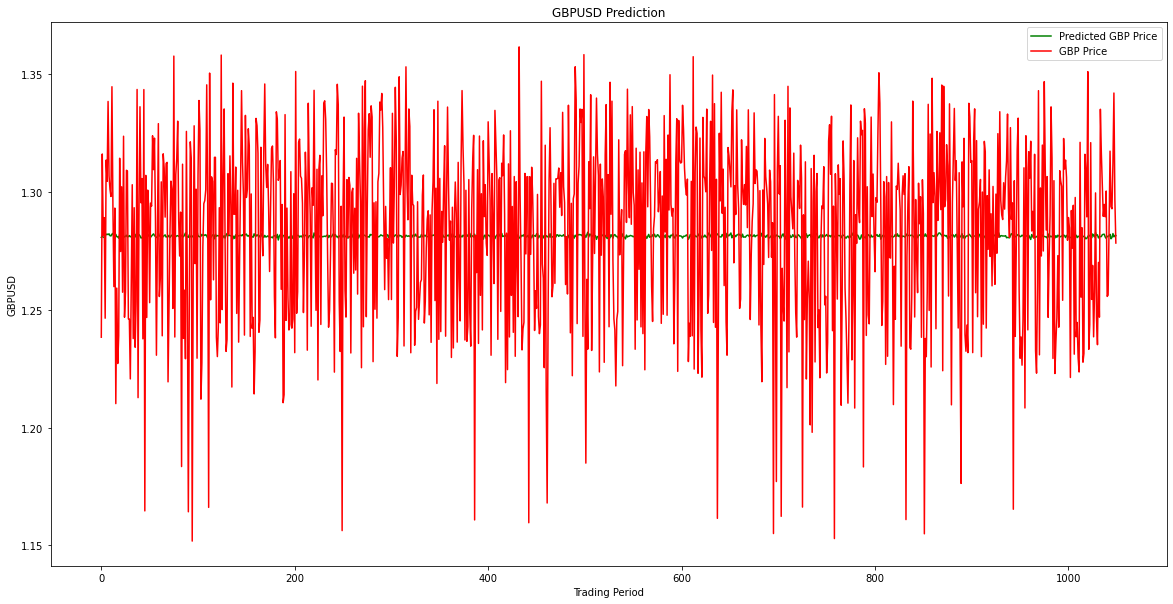

In [104]:
plt.figure(figsize=(20,10))
plt.plot(prediction_rsi[4000:5050,:], color = 'green', label = 'Predicted GBP Price')
plt.plot(y_test[4000:5050,:], color = 'red', label = 'GBP Price' )
plt.title('GBPUSD Prediction')
plt.xlabel('Trading Period')
plt.ylabel('GBPUSD')
plt.legend()
plt.show()

2nd run of the model

In [120]:
y = data_gbp2['Close'].values.reshape(-1,1)
X = data_gbp2['RSI'].values.reshape(-1,1)

sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)
y_scaled = sc.fit_transform(y)
y_scaled

array([[0.75568721],
       [0.75559676],
       [0.75564199],
       ...,
       [0.95961286],
       [0.95927366],
       [0.95925105]])

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)

In [122]:
X_train = np.reshape(X_train, (len(X_train), 1, 1)) 
X_test = np.reshape(X_test, (len(X_test), 1, 1))
y_train = np.reshape(y_train, (len(y_train), 1, 1)) 
y_test = np.reshape(y_test, (len(y_test), 1, 1))

In [123]:
#Initializing the regressor Network
regressor = Sequential()

#Adding the input LSTM network layer
regressor.add(LSTM(60,activation='relu', input_shape = (X_train.shape[1], 1), return_sequences=True))
regressor.add(Dropout(0.2))

#Adding a second LSTM network layer
regressor.add(LSTM(128, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a third LSTM network layer
regressor.add(LSTM(256, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a fourth LSTM network layer
regressor.add(LSTM(256, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(1))

In [124]:
#Compiling the network
regressor.compile( loss='mean_squared_error',
              optimizer=Adam(lr=1e-6),
              metrics=['mse'] )

#Fitting the data to the model
regressor.fit(X_train,y_train, epochs=50)

Epoch 1/50
8888/8888 [==============================] - 86s 10ms/step - loss: 1.5042 - mse: 1.5042
Epoch 2/50
8888/8888 [==============================] - 87s 10ms/step - loss: 0.9055 - mse: 0.9055
Epoch 3/50
8888/8888 [==============================] - 88s 10ms/step - loss: 0.1415 - mse: 0.1415
Epoch 4/50
8888/8888 [==============================] - 88s 10ms/step - loss: 0.0105 - mse: 0.0105
Epoch 5/50
8888/8888 [==============================] - 88s 10ms/step - loss: 0.0087 - mse: 0.0087
Epoch 6/50
8888/8888 [==============================] - 88s 10ms/step - loss: 0.0074 - mse: 0.0074
Epoch 7/50
8888/8888 [==============================] - 88s 10ms/step - loss: 0.0065 - mse: 0.0065
Epoch 8/50
8888/8888 [==============================] - 88s 10ms/step - loss: 0.0059 - mse: 0.0059
Epoch 9/50
8888/8888 [==============================] - 88s 10ms/step - loss: 0.0055 - mse: 0.0055
Epoch 10/50
8888/8888 [==============================] - 88s 10ms/step - loss: 0.0052 - mse: 0.0052
Epoch 11/

In [125]:
predict1 = regressor.predict(X_test)



In [126]:
prediction = predict1.reshape(-1,1)
predict_rsi= sc.inverse_transform(prediction)

In [127]:
predict_rsi.shape

(71102, 1)

In [128]:
y_test = np.reshape(y_test, (len(y_test), 1))

In [132]:
y_test

array([[1.301005],
       [1.258775],
       [1.24615 ],
       ...,
       [1.322315],
       [1.292885],
       [1.305805]])

In [133]:
predict_rsi

array([[1.4245849],
       [1.4245754],
       [1.4245045],
       ...,
       [1.4244666],
       [1.4242208],
       [1.4245718]], dtype=float32)